# Customer Prediction Through Machine Learning

## Importing Libraries:-
### For data exploration, it is mandatory to have a few Python libraries installed

In [6]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

### Importing KMeans algorithm to be used for data analytics

In [37]:
from sklearn.cluster import KMeans

### Importing warnings library to clean my further project by ignoring the warnings

In [38]:
import warnings 
warnings.filterwarnings("ignore")

## View Dataset:-
### To view the dataset we have to import by reading the CSV file as shown below

In [39]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Visualizations:-
### Correlation between Age, Income and Spending scores
#### Analyzing the spending patterns is the better strategy for marketing. Here, we will try to analyze and find how the age, annual incomes and spending scores of the customers are.

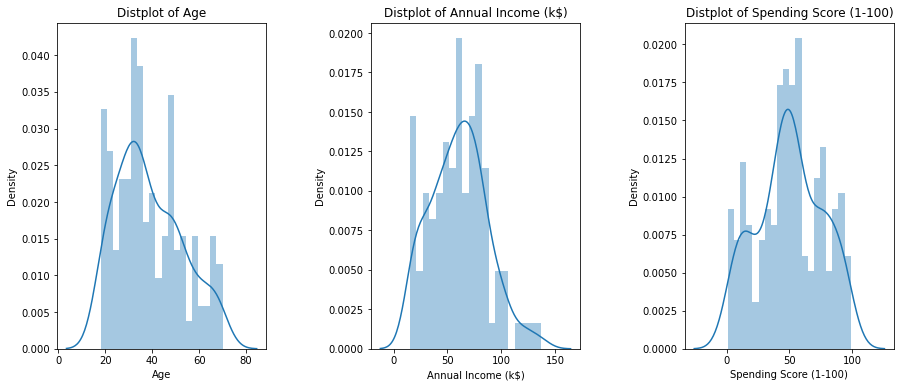

In [40]:
plt.figure(1 , figsize = (15 , 6)) # sets the dimensions of image
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n) # creates 3 different sub-plots
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20) # creates a distribution plot
    plt.title('Distplot of {}'.format(x)) # sets title for each plot
plt.show() # displays all the plots

## Gender Analysis:-
### The second most important thing in deciding the strategy is to analyze the spending patterns based on Gender. Here, we find that Females tend to purchase more than Males do.

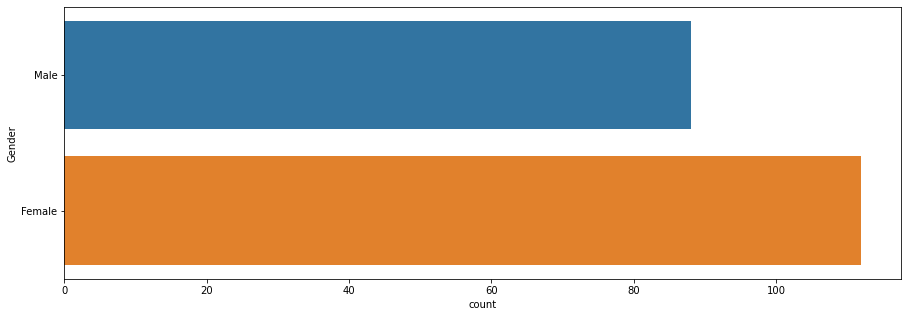

In [41]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

## Customer segmentation:- 
### Segmentation helps in dividing a set of large data into groups of smaller observations that are similar in specific ways relevant to marketing. Each group contains individuals that are similar in-between themselves, and different from individuals from the other groups. 

### Segmentation is widely used as a marketing tool to create a clusters of clients and adapt a relevant strategy for each of them.

## Segmentation using Age and Spending Score:-
### Here we will be segmenting the customers based on their age and their spending scores. This will help us to understand the age category of the customers, which could possibly improve spending score, therby increasing the revenue for the company.

### In this case, we have to decide the possible number of clusters(segments) that would return the best results. To do that, we loop through 1 to 11, and find which customer would be the right choice.

In [42]:
X_age_spending = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values # extracts only age and spending score information from the dataframe
inertia = []
for n in range(1 , 11):
    model_1 = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 , max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')) # use predefined Kmeans algorithm
    model_1.fit(X_age_spending) # fit the data into the model
    inertia.append(model_1.inertia_)

### After using segmentation on the dataset, we need to visualize this by plotting the graph:-

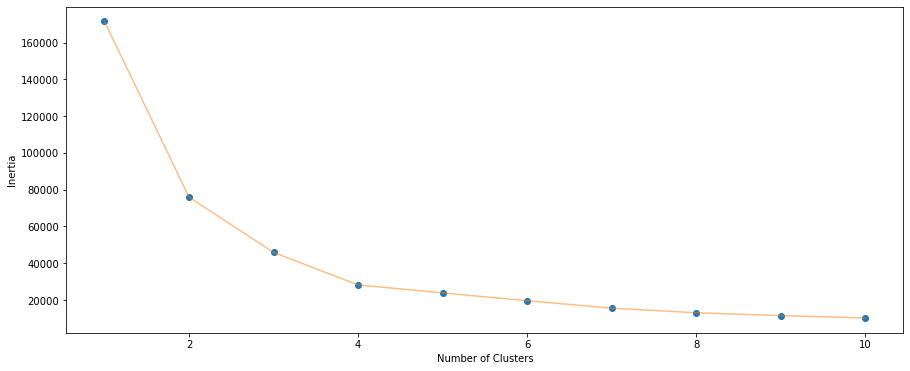

In [43]:
plt.figure(1 , figsize = (15 ,6)) # set dimension of image
plt.plot(np.arange(1 , 11) , inertia , 'o') # Mark the points with a solid circle
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5) # connect remaining points with a line
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia') # label the x and y axes
plt.show() # display

### After cluster 4 , the line graph starts becoming stable. This is known as Elbow Method.

In [34]:
model_2 = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') ) # set number of clusters as 4
model_2.fit(X_age_spending) # fit the model
labels1 = model_2.labels_
centroids1 = model_2.cluster_centers_

### Some prerequisites for plotting a graph - max and min ranges of values, initialising a meshgrid(), and so on:-

In [35]:
h = 0.02
x_min, x_max = X_age_spending[:, 0].min() - 1, X_age_spending[:, 0].max() + 1
y_min, y_max = X_age_spending[:, 1].min() - 1, X_age_spending[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])  # returns flattened 1D array

### Plotting the graph:-

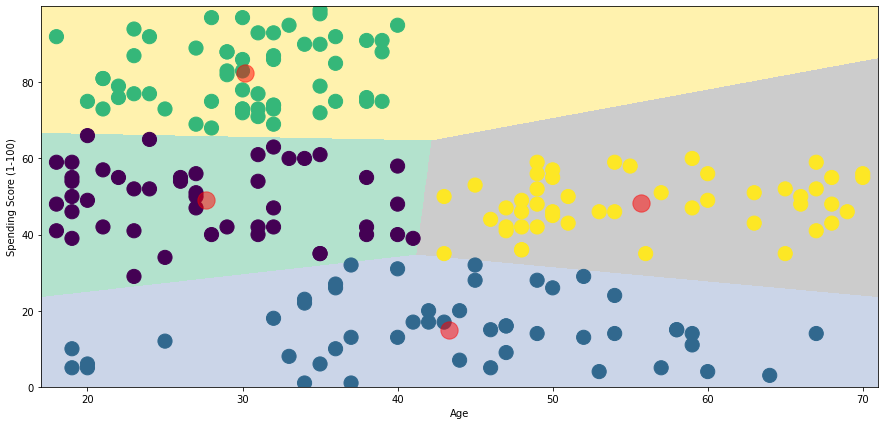

In [46]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

## K-Means with 4 clusters
## (Graph includes Four clusters with the Red Points referring to the centroids of the respective clusters)

### So now we can deduce the following informatin about the spending patterns:

### 1. The average spending score irrespective of age would be around 20.
### 2. In the topmost cluster, Customers below age 40 has the highest spending scores. The cluster is less sparse.
### 3. Above age 40, the spending score remains consistently within the range of 30 - 60.